In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import alpha_vantage.timeseries as av
import seaborn as sns
from alpha_vantage.timeseries import TimeSeries

In [2]:
API_KEY = 'AF0QQPWEJSK14SBH'
SYMBOL = 'AAPL' 

In [3]:
ts = TimeSeries(key=API_KEY, output_format='pandas')
data, meta_data = ts.get_intraday(symbol=SYMBOL, interval='5min', outputsize='full')

In [4]:
last_week_data = data.tail(7 * 24 * 12)  

In [5]:
last_week_data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [6]:
last_week_data['Rolling Volatility'] = last_week_data['Close'].rolling(window=20).std()


C:\Users\Hp\AppData\Local\Temp\ipykernel_28140\1239895413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_week_data['Rolling Volatility'] = last_week_data['Close'].rolling(window=20).std()


In [7]:
def calculate_vwap(df):
    return (df['Volume'] * (df['High'] + df['Low'] + df['Close']) / 3).cumsum() / df['Volume'].cumsum()

last_week_data['VWAP'] = calculate_vwap(last_week_data)


C:\Users\Hp\AppData\Local\Temp\ipykernel_28140\3394626061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_week_data['VWAP'] = calculate_vwap(last_week_data)


In [8]:
last_week_data['MA_20'] = last_week_data['Close'].rolling(window=20).mean()
last_week_data['MA_50'] = last_week_data['Close'].rolling(window=50).mean()

C:\Users\Hp\AppData\Local\Temp\ipykernel_28140\3082012319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_week_data['MA_20'] = last_week_data['Close'].rolling(window=20).mean()
C:\Users\Hp\AppData\Local\Temp\ipykernel_28140\3082012319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_week_data['MA_50'] = last_week_data['Close'].rolling(window=50).mean()


In [9]:
last_week_data.fillna(method='ffill', inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_28140\1283150351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_week_data.fillna(method='ffill', inplace=True)


In [12]:
# Calculate z-scores for each column separately
z_scores = pd.DataFrame()
for column in last_week_data.columns:
    z_scores[column] = np.abs((last_week_data[column] - last_week_data[column].mean()) / last_week_data[column].std())

# Set threshold for outliers
outlier_threshold = 3

# Replace outliers with median values column by column
for column in last_week_data.columns:
    mask = z_scores[column] > outlier_threshold
    last_week_data.loc[mask, column] = last_week_data[column].median()

In [13]:
sns.set(style="whitegrid")

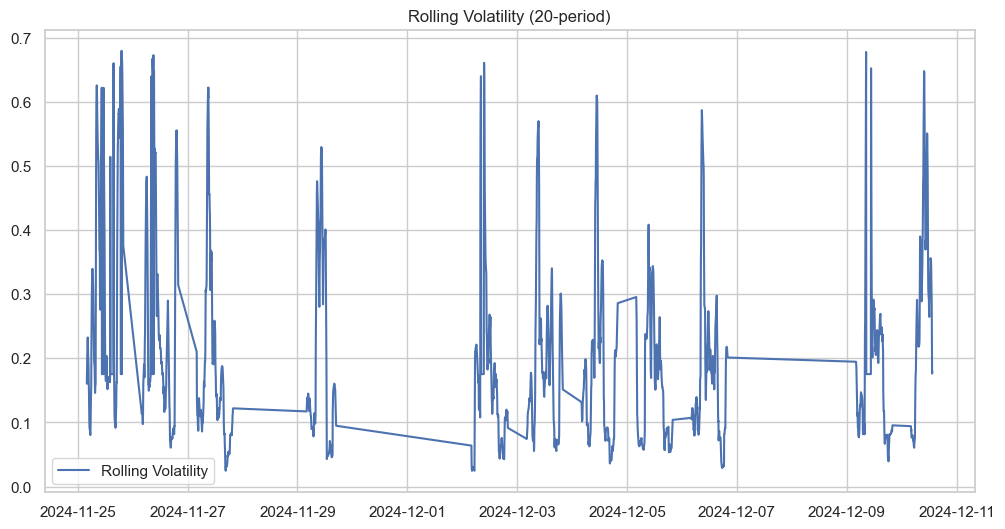

In [14]:
# Rolling Volatility Visualization

plt.figure(figsize=(12, 6))

plt.plot(last_week_data['Rolling Volatility'], label='Rolling Volatility')
plt.title('Rolling Volatility (20-period)')
plt.legend()
plt.show()


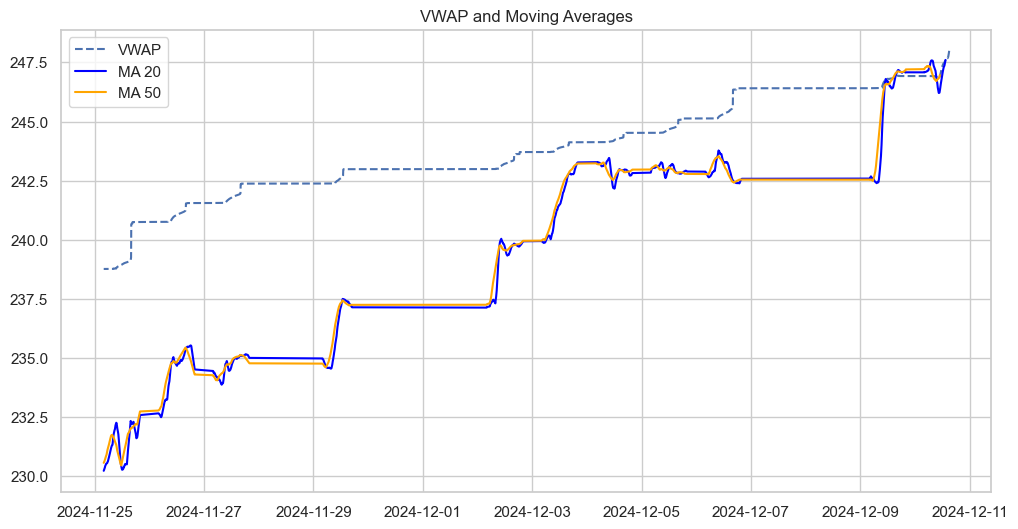

In [15]:
# VWAP and Moving Averages Visualization

plt.figure(figsize=(12, 6))
plt.plot(last_week_data['VWAP'], label='VWAP', linestyle='--')
plt.plot(last_week_data['MA_20'], label='MA 20', color='blue')
plt.plot(last_week_data['MA_50'], label='MA 50', color='orange')
plt.title('VWAP and Moving Averages')
plt.legend()
plt.show()

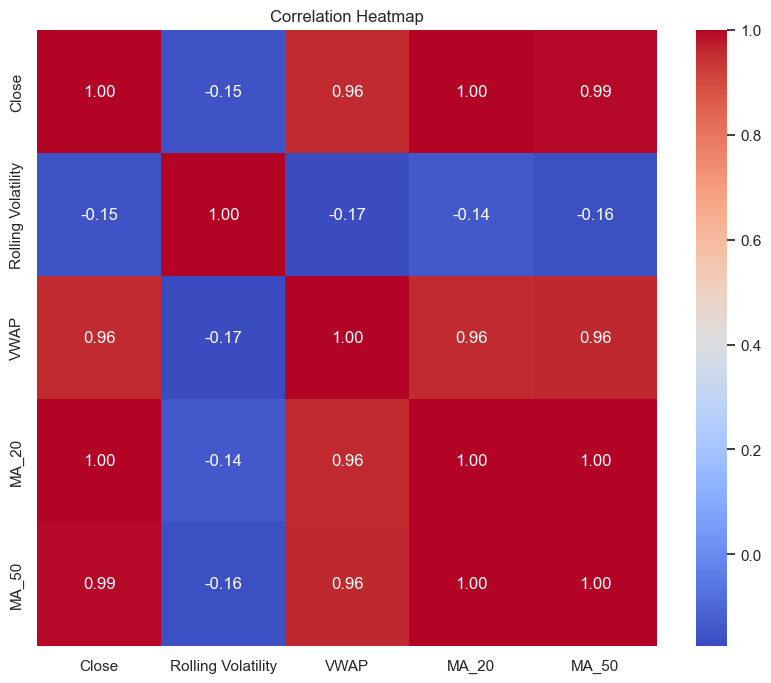

In [24]:
# Correlation Heatmap 

plt.figure(figsize=(10, 8))
corr = last_week_data[['Close', 'Rolling Volatility', 'VWAP', 'MA_20', 'MA_50']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# Step 5: Statistical Measures

std_dev = last_week_data['Close'].std()
skewness = last_week_data['Close'].skew()

print("Key Statistical Measures:")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")


Key Statistical Measures:
Standard Deviation: 4.894994640194671
Skewness: -0.2512328381007711


In [30]:
unusual_volatility_threshold = 1.5 * last_week_data['Rolling Volatility'].mean()
unusual_volatility = last_week_data[last_week_data['Rolling Volatility'] > unusual_volatility_threshold]

print("Unusual Trading Patterns:")
print(unusual_volatility)

Unusual Trading Patterns:
                        Open      High       Low     Close    Volume  \
date                                                                   
2024-12-10 12:55:00  246.885  246.9800  246.7700  246.8500  160315.0   
2024-12-10 12:50:00  247.100  247.1050  246.8821  246.8821  136477.0   
2024-12-10 12:45:00  247.200  247.2899  247.0728  247.1082  153909.0   
2024-12-10 12:40:00  247.075  247.1900  246.9700  247.1775  133953.0   
2024-12-10 12:35:00  247.310  247.3150  247.0300  247.0701  156347.0   
...                      ...       ...       ...       ...       ...   
2024-11-25 06:35:00  230.510  230.5800  230.5000  230.5500     416.0   
2024-11-25 06:30:00  230.510  230.5800  230.5000  230.5200     603.0   
2024-11-25 06:25:00  230.550  230.5800  230.5100  230.5100     436.0   
2024-11-25 06:20:00  230.610  230.6800  230.5000  230.5200    2224.0   
2024-11-25 06:15:00  230.600  230.6800  230.5900  230.6100     654.0   

                     Rolling Volatili

Analyzing Unusual Volatility Patterns:
             Open        High         Low       Close        Volume  \
count  372.000000  372.000000  372.000000  372.000000  3.720000e+02   
mean   237.864316  238.050810  237.621421  237.886731  2.120659e+05   
std      5.404747    5.413969    5.408020    5.402335  2.554574e+05   
min    230.325000  230.370000  228.850000  230.250000  2.120000e+02   
25%    233.217500  233.487500  233.147500  233.370000  6.156000e+03   
50%    235.610050  235.730000  235.510000  235.610000  1.068845e+05   
75%    242.840000  243.052500  242.665700  242.855000  3.563078e+05   
max    247.920000  248.050000  247.860000  247.950000  1.206128e+06   

       Rolling Volatility        VWAP       MA_20       MA_50  
count          372.000000  372.000000  372.000000  356.000000  
mean             0.454918  242.764006  238.046375  237.805538  
std              0.104112    2.494034    5.312810    5.090376  
min              0.308285  238.765972  230.351915  230.452780  
2

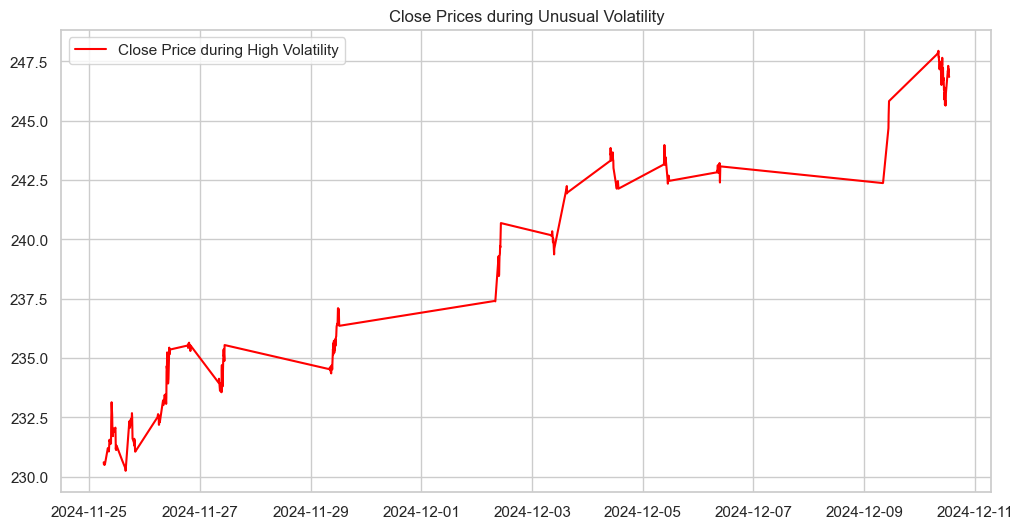

In [31]:
if not unusual_volatility.empty:
    print("Analyzing Unusual Volatility Patterns:")
    print(unusual_volatility.describe())
    plt.figure(figsize=(12, 6))
    plt.plot(unusual_volatility['Close'], label='Close Price during High Volatility', color='red')
    plt.title('Close Prices during Unusual Volatility')
    plt.legend()
    plt.show()

In [32]:
last_week_data.to_csv('last_week_stock_analysis.csv')